## Exponential Solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline 
from scipy.optimize import curve_fit
import os

Directory housekeeping

In [2]:
basedir = '/home/david/gh/intro_curve_fitting_python'

try:
    os.chdir(basedir)
except:
    print('\n\nproblem changing to the directory you specified; does it exist?\nthe kernel will now restart; rerun this program.\n\n')
    quit()

In the '.../intro_curve_fitting_python/exponential_data' directory you will find the following files:

In [3]:
filenames = os.listdir(basedir+'/exponential_data/')
filenames

['exponential2.csv', 'exponential3.csv', 'exponential1.csv']

It should not be too difficult to adapt your work from the linear fitting exercises to these data sets.<br><br>To get you started, I will define an appropriate fitting function:
$$f(x)=c+A_0e^{kx}$$
with $k<0$ assumed. 


Note that you will have to customize this function to fit data set 3. If you get stuck with that, check out the [notebook](./generate_datasets.ipynb) with which I created the data, or view it as a [webpage](./generate_datasets.html).

In [4]:
def genexpfunc(x, a, k, c):
    return c+a*np.exp(k*x)

<font size="5">exponential1.csv</font>

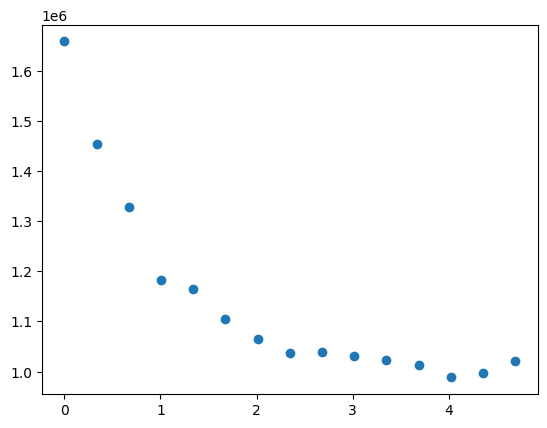

In [5]:
# dataset exponential1.csv
fn = basedir+'/exponential_data/exponential1.csv'

x = []
y = []

inf = open(fn)

for line in inf:
    line = line.rstrip()
    la = line.split(',')
    x.append(float(la[0]))
    y.append(float(la[1]))

inf.close()

x=np.array(x)
y=np.array(y)

plt.scatter(x,y)
plt.show()

When fitting any model more complicated than a straight line, it is wise to specify an initial set of parameters to the fitting routine which are in the right range to describe the data to be fit. So, let's estimate the parameters a, c, and k.<br><br>By eye, this looks like an exponential decay curve that has 'gone to zero' to me... a lot of half-lives have passed. So, let's estimate c as the last y value in the data set. Then, the first y value in the data set, at $x=0$ will have the value $c+A_0e^0$, and estimate $A_0=y-c$. 

In [6]:
c=y[-1:][0]
a=y[:1][0]-c

<font size="5">On estimating k</font><br><br>
No doubt you are familiar with the idea 'after 10 half-lives, a radioactive substance has, for all intents and purposes, decayed away.' In analogy with the concept of the half-life is the concept of the <i>lifetime.</i> After one lifetime, $\tau$, of the process has passed, $\frac{1}{e}$ of the original material remains. Therefore, if:
$$y(t)=A_0e^{kt}$$then:
$$y(\tau)=A_0e^{k\tau}$$and:
$$y(\tau)=\frac{A_0}{e}$$Setting these last two equations equal to each other and solving for $\tau$ provides:

$$\frac{A_0}{e}=A_0e^{k\tau}$$
$$\frac{1}{e}=e^{k\tau}$$
Taking logarithms and rearranging:
$$-1=k\tau$$
$$\tau=-\frac{1}{k}$$
Therefore, if you can eyeball the number of lifetimes $n$ described by the extent of decay you see in your data, you can estimate $k$ as:

$$k=-\frac{n}{t_{max}}$$
in which $t_{max}$ is the largest value of the independent variable in the data.<br><br>
To get a feel for how much decay goes with an arbitrary number of lifetimes, here are decays for one, three, five, and seven lifetimes.

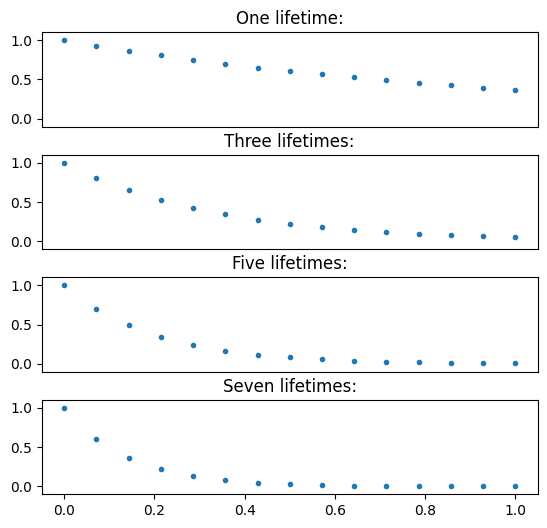

In [7]:
fig = plt.figure()

fig.set_figwidth=(8)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=4,
						hspace=0.3)  # height_ratios=[4, 1], width_ratios=[], hspace=??

t = np.linspace(0,1, 15)

n = [1, 3, 5, 7] # lifetimes

for i in range(4): 
    if i==0:
        why=np.exp(-n[i]*t)
    else:
        why = np.vstack((why,np.exp(-n[i]*t)))

ax0 = fig.add_subplot(spec[0])
ax0.scatter(t,why[0], marker='.')
ax0.set_title('One lifetime:')
ax0.set_ylim([-0.1, 1.1])
ax0.set_xticks([])

ax1 = fig.add_subplot(spec[1])
ax1.scatter(t,why[1], marker='.')
ax1.set_title('Three lifetimes:')
ax1.set_ylim([-0.1, 1.1])
ax1.set_xticks([])

ax2 = fig.add_subplot(spec[2])
ax2.scatter(t,why[2], marker='.')
ax2.set_title('Five lifetimes:')
ax2.set_ylim([-0.1, 1.1])
ax2.set_xticks([])

ax3 = fig.add_subplot(spec[3])
ax3.scatter(t,why[3], marker='.')
ax3.set_title('Seven lifetimes:')
ax3.set_ylim([-0.1, 1.1])

plt.show()

Based on the plots above, I'm eyeballing $n=3$ lifetimes for the data and estimating:
$$k=-3/1=-0.333$$

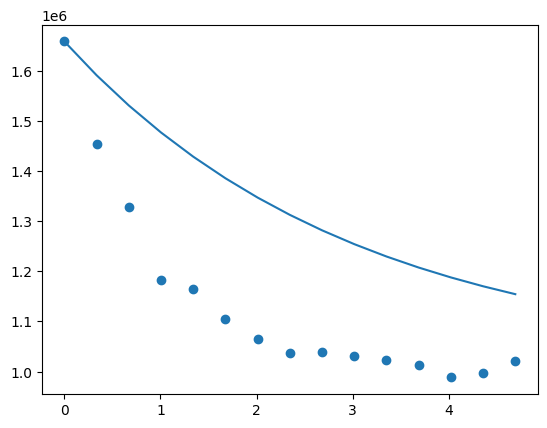

In [8]:
k=-1/3
# initial values of parameters
p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

Not bad; I'm going to make $k$ larger, so $y$ decays a faster:

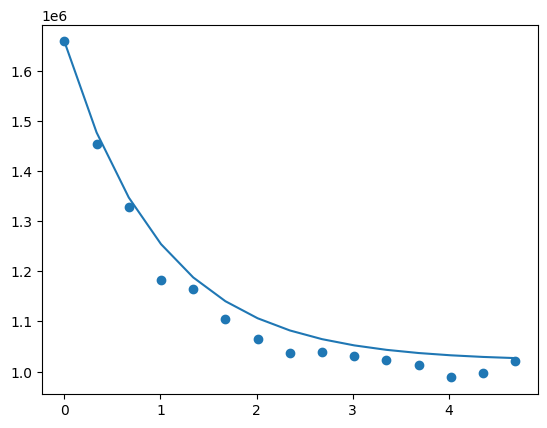

In [9]:
k=-1
# initial values of parameters
p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

That ought to do it. Carry out the curve fit:

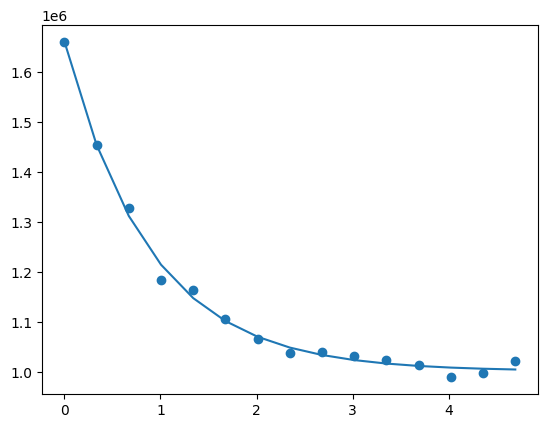

In [10]:
popt, pcov = curve_fit(genexpfunc, x, y, p0=p)

plt.scatter(x,y)
plt.plot(x,genexpfunc(x,*popt))
plt.show()

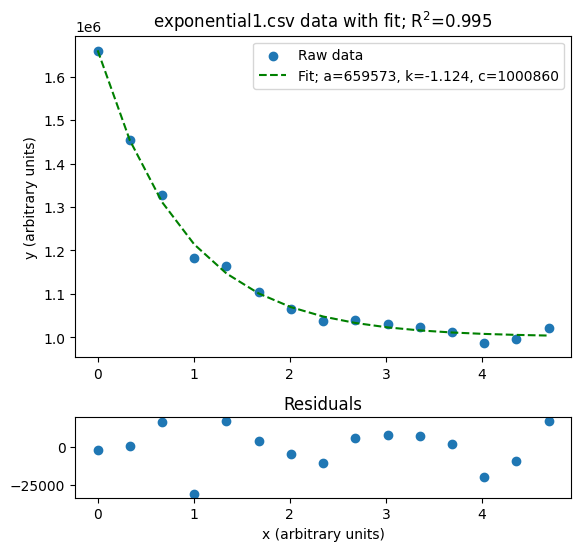

In [11]:
residuals = y-genexpfunc(x, *popt)

rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.0f, k=%0.3f, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential1.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()

<font size="5">exponential2.csv</font>

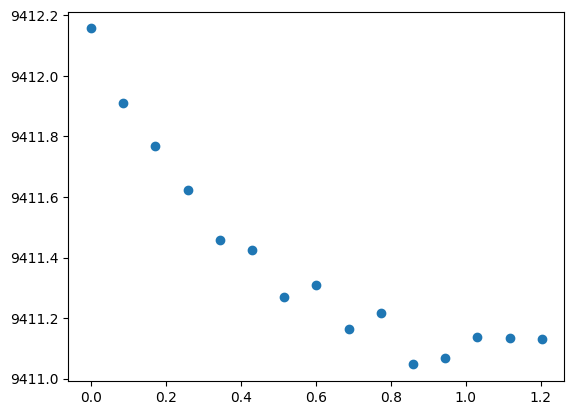

In [12]:
# dataset exponential2.csv
fn = basedir+'/exponential_data/exponential2.csv'

x = []
y = []

inf = open(fn)

for line in inf:
    line = line.rstrip()
    la = line.split(',')
    x.append(float(la[0]))
    y.append(float(la[1]))

inf.close()

x=np.array(x)
y=np.array(y)

plt.scatter(x,y)
plt.show()

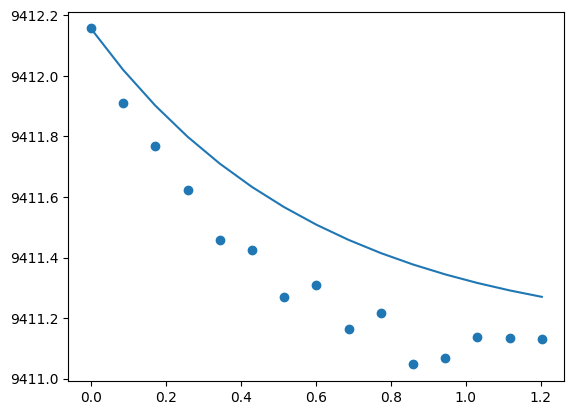

In [13]:
c=y[-1:][0]
a=y[:1][0]-c
# eyeballing n=2
# let's define a function to estimate k once n has been eyeballed
def estk(x,y,n):
    maxx=np.max(x)
    estk = -n / maxx
    return estk
k=estk(x,y,2)

p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

Tweaking $k$ for quicker decay:

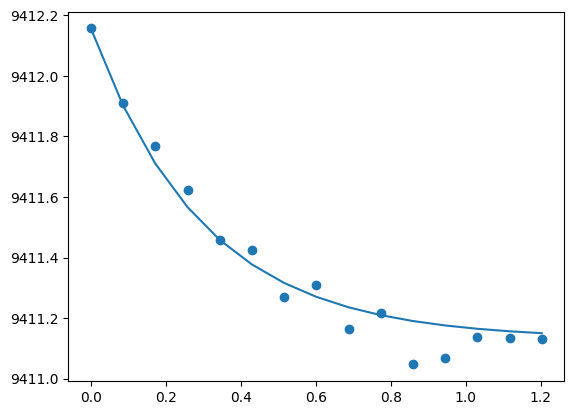

In [14]:
k=2*estk(x,y,2)

p = np.array([a,k,c])

plt.plot(x, genexpfunc(x, *p))
plt.scatter(x,y)
plt.show()

That ought to do it. Carry out the curve fit:

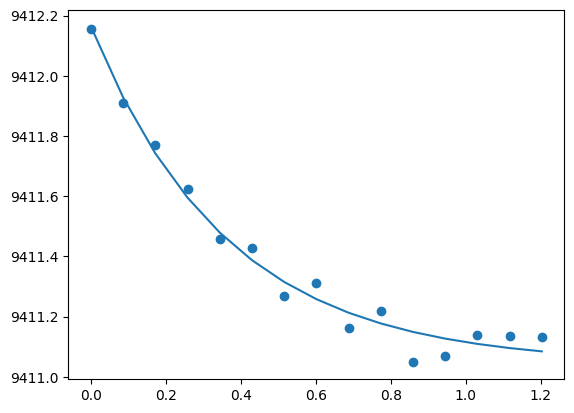

In [15]:
popt, pcov = curve_fit(genexpfunc, x, y, p0=p)

plt.scatter(x,y)
plt.plot(x,genexpfunc(x,*popt))
plt.show()

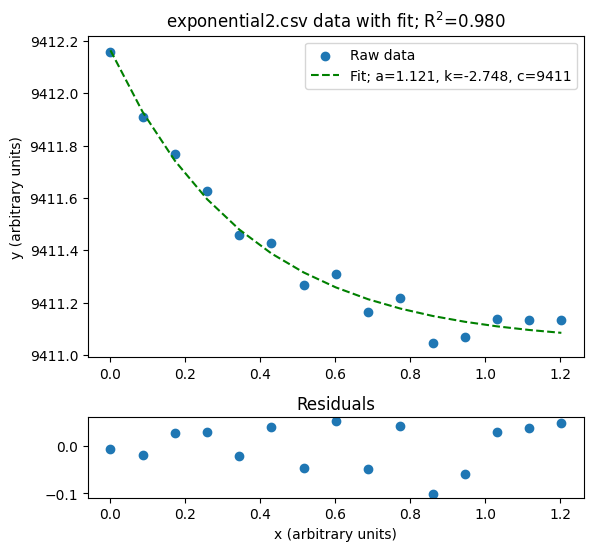

In [16]:
residuals = y-genexpfunc(x, *popt)

rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, genexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.3f, k=%0.3f, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential2.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()

<font size="5">exponential3.csv</font>

In [17]:
# define a function that will read an arbitrary
# two-column csv file into numpy arrays x and y:

def csv2xy(fn):
    x = []
    y = []
    inf = open(fn)
    for line in inf:
        line = line.rstrip()
        la = line.split(',')
        x.append(float(la[0]))
        y.append(float(la[1]))
    inf.close()
    x=np.array(x)
    y=np.array(y)
    return x,y

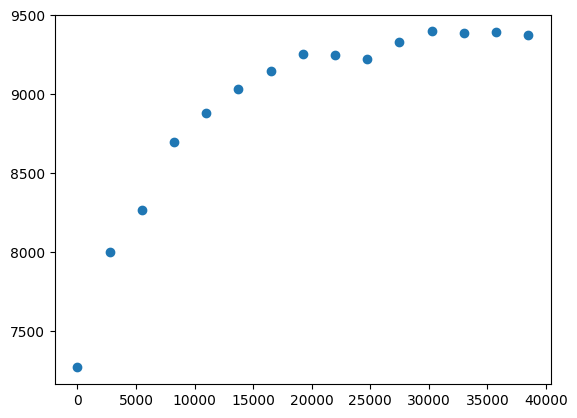

In [18]:
# dataset exponential3.csv
fn = basedir+'/exponential_data/exponential3.csv'

x,y = csv2xy(fn)
plt.scatter(x,y)
plt.show()

This is a decaying exponential of the form:
$$f(x)=c+A(1-e^{kx})$$
assuming $k<0$, so let's encode that function:

In [19]:
def geninvertedexpfunc(x, a, k, c):
    return c+a*(1-np.exp(k*x))

By eye, $c=7300$, $a=9500-7300=1800$, say four lifetimes, so $k=-\frac{4}{40000}$:

[]

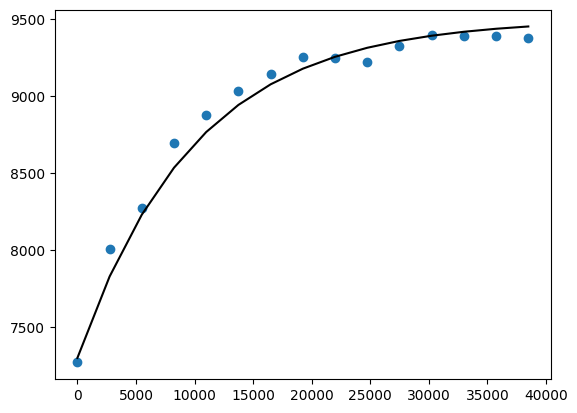

In [20]:
c=7300
a=9500-c
k=-4/40000
p=np.array([a,k,c])

plt.plot(x, geninvertedexpfunc(x, *p), 'k')
plt.scatter(x,y)
plt.plot()

Looks good; do the curve fit:

In [21]:
popt, pcov = curve_fit(geninvertedexpfunc, x, y, p0=p)
popt

array([ 2.10089516e+03, -1.27365782e-04,  7.29848222e+03])

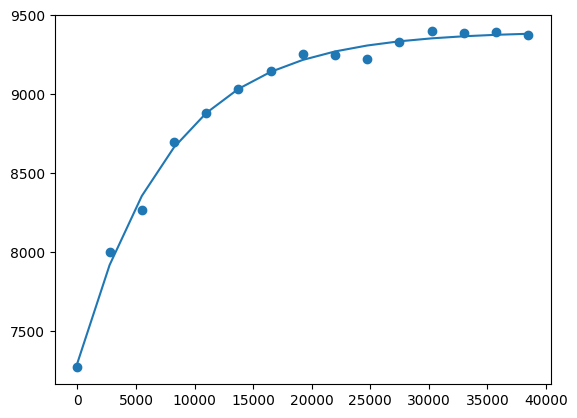

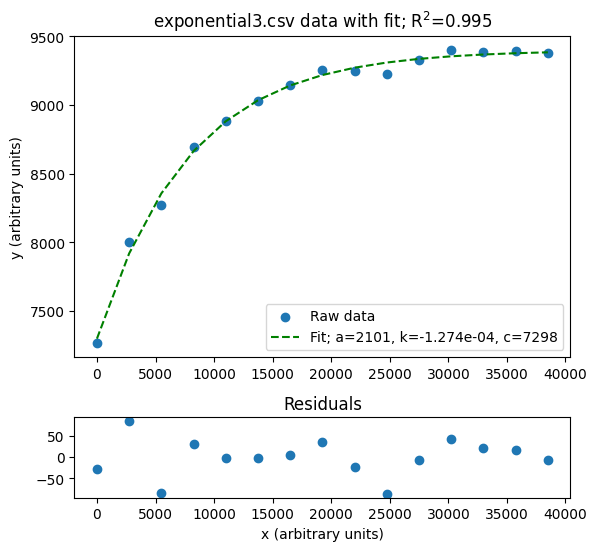

In [22]:
plt.scatter(x,y)
plt.plot(x,geninvertedexpfunc(x,*popt))
plt.show()

residuals = y-geninvertedexpfunc(x, *popt)

rsq = 1 - np.sum(np.square(residuals))/np.sum(np.square(y-np.mean(y)))

fig = plt.figure()

fig.set_figwidth=(4)
fig.set_figheight(6)

spec = gridspec.GridSpec(ncols=1, nrows=2,
						hspace=0.3, height_ratios=[4, 1])

ax0 = fig.add_subplot(spec[0])
ax0.scatter(x,y, label='Raw data')
ax0.plot(x, geninvertedexpfunc(x, *popt), 'g--',
         label='Fit; a=%0.0f, k=%.3e, c=%0.0f' % tuple(popt))
ax0.set_ylabel('y (arbitrary units)')
ax0.set_title('exponential3.csv data with fit; R$^2$=%0.3f' % rsq)
ax0.legend()

ax1 = fig.add_subplot(spec[1])
ax1.set_title('Residuals')
ax1.set_xlabel('x (arbitrary units)')
ax1.scatter(x, residuals)

# display and save the figure
plt.show()